In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
loan_data = pd.read_csv('Loan_Status.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.shape

(614, 13)

In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_data = loan_data.dropna()

In [7]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_data.replace({'Loan_Status':{'Y':1,'N':0}}, inplace=True)

In [9]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [10]:
loan_data.Dependents.value_counts(
)

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
# Replace the 3+ value to 4
loan_data = loan_data.replace(to_replace='3+', value=4)

In [12]:
loan_data.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [21]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data visulization

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

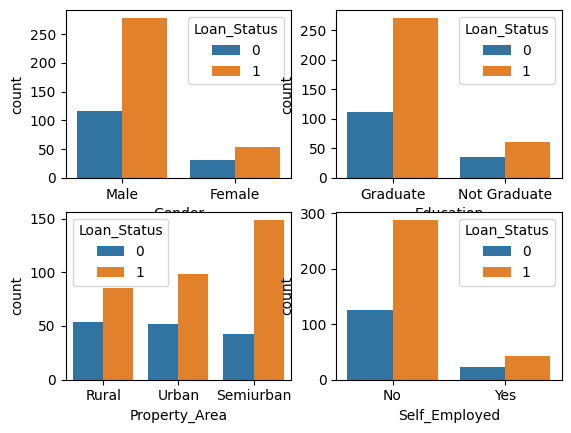

In [54]:
plt.subplot(2,2,1)
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data)
plt.subplot(2,2,2)
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)
plt.subplot(2,2,3)
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_data)
plt.subplot(2,2,4)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data)

In [55]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [65]:
loan_data.Property_Area.value_counts()


Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [66]:
# Encoding
loan_data.replace({'Gender':{'Male':1,'Female':0},"Married":{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},
                  'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Urban':1,'Semiurban':3}},inplace=True)

In [67]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [70]:
#Sepreate data to label

X = loan_data.drop(columns=['Loan_ID','Loan_Status'])
Y = loan_data['Loan_Status']

In [71]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

###  Split data to train and test

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(480, 11) (432, 11) (48, 11)
(480,) (432,) (48,)


# Model Training SVC

In [73]:
from sklearn.svm import SVC

In [74]:
classifier = SVC(kernel='linear')

In [75]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evalution


In [80]:
classifier.score(X_train,Y_train) # Accuracy on train data

0.7893518518518519

In [81]:
classifier.score(X_test,Y_test)# Accuracy on test data

0.7708333333333334

# Predective system

In [117]:
loan_stats = X_test[:1]

prediction = classifier.predict(loan_stats)
print(prediction)

if (prediction[0] == 1):
    print('Loan Passed')
else:
    print('Loan Reject')

[1]
Loan Passed


In [118]:
Y_test[:1]

368    1
Name: Loan_Status, dtype: int64